# Experimentando classificação com diferentes tipos de preprocessamento no calculo do LBP

> Utilizando o dataset de toras previamente cortadas

* com diferentes quantidades de pontos para o cálculo do LBP (4 e 8);
  * com diferentes formas de "Binarizar" com OTSU antes de ir para o LBP:
    * maior: pixel com valor maior que o threshold se torna 1;
    * menor: pixel com valor menor que o threshold se torna 0;
    * ambos;

## Importando bibliotecas

## Analisando desempenho com KNN

> Descomente _imports_ caso não tenha executado células superiores

In [1]:
# # importado de células anteriores
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearnex import patch_sklearn
patch_sklearn() # Deve ser chamada antes dos imports no sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

N_POINTS = [4, 8]
TARGET_NAMES = ['broca', 'fissura', 'musgo', 'quebra'] # Já declarado anteriormente
FUNC_NAMES = ['ambos', 'menor', 'maior']

# Gerando 30 sementes "aleatórias" dentro do intervalo [0, 8000)
seed_arr = np.random.randint(8000, size=30)
seed_arr

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


array([ 425, 5862, 1094, 2639, 4030,  906, 5449, 7497, 6444, 7807,  933,
       5865,  203, 3771, 4548, 3560, 5002, 5989,  991,  976, 1672,  710,
       1839, 4589, 4715,  947, 2436,  840, 5028, 1041])

In [2]:
points_dict = {p:{'acuracias':[]} for p in N_POINTS}

for n_points in points_dict:
  X_list = []
  for name in FUNC_NAMES:
    points_dict[n_points][f'cm_{name}'] = []

    data = pd.read_csv(f'./csvs/prepro_6-{name}-P{n_points}.csv')
    target = data.pop('target').values
    X_list.append((data.values, target))

  for rodada, seed in enumerate(seed_arr):
    acc = [0, 0, 0]
    
    for i, (X, y) in enumerate(X_list):
      # separando dados
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

      # Instanciando classificador
      clf = KNeighborsClassifier().fit(X_train, y_train)

      acc[i] = clf.score(X_test, y_test)
      y_pred = clf.predict(X_test)
      points_dict[n_points][f'cm_{FUNC_NAMES[i]}'].append(confusion_matrix(y_test, y_pred, normalize='true'))

    points_dict[n_points]['acuracias'].append(acc)

       ambos     menor     maior
0   0.525140  0.550279  0.567039
1   0.505587  0.502793  0.511173
2   0.516760  0.550279  0.525140
3   0.539106  0.522346  0.578212
4   0.502793  0.508380  0.555866
5   0.455307  0.541899  0.516760
6   0.480447  0.527933  0.502793
7   0.458101  0.553073  0.536313
8   0.494413  0.527933  0.530726
9   0.460894  0.578212  0.533520
10  0.500000  0.544693  0.544693
11  0.472067  0.541899  0.541899
12  0.497207  0.530726  0.527933
13  0.505587  0.572626  0.564246
14  0.550279  0.547486  0.530726
15  0.505587  0.505587  0.525140
16  0.488827  0.519553  0.533520
17  0.477654  0.541899  0.561453
18  0.502793  0.553073  0.539106
19  0.477654  0.539106  0.530726
20  0.483240  0.519553  0.547486
21  0.491620  0.575419  0.575419
22  0.527933  0.530726  0.519553
23  0.432961  0.491620  0.511173
24  0.530726  0.561453  0.569832
25  0.466480  0.564246  0.550279
26  0.486034  0.569832  0.533520
27  0.497207  0.539106  0.536313
28  0.530726  0.561453  0.536313
29  0.4972

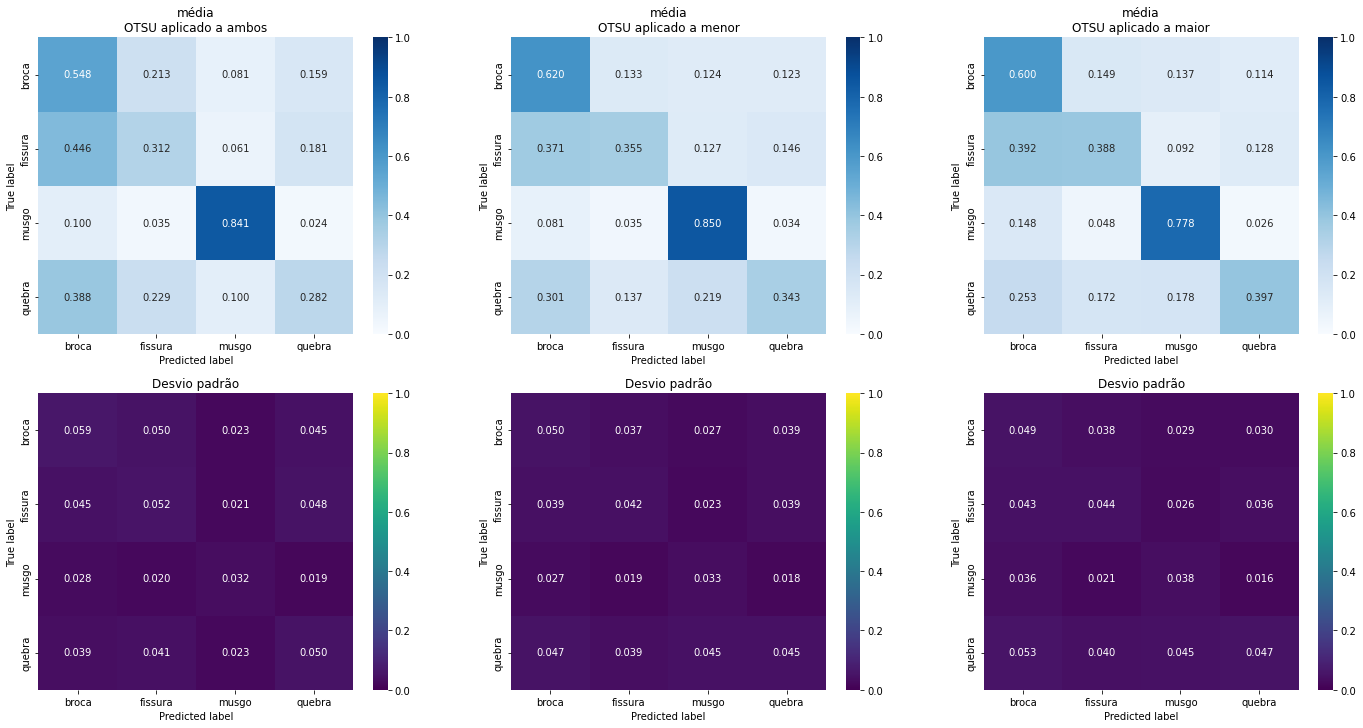

           ambos      menor      maior
count  30.000000  30.000000  30.000000
mean    0.495345   0.541993   0.540410
std     0.026836   0.023775   0.020418
min     0.432961   0.491620   0.502793
25%     0.478352   0.527933   0.528631
50%     0.497207   0.541899   0.536313
75%     0.505587   0.559358   0.554469
max     0.550279   0.586592   0.578212


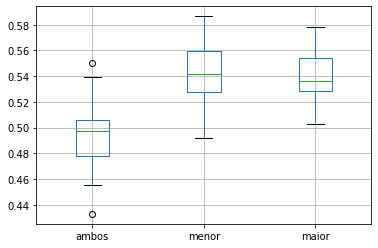

       ambos     menor     maior
0   0.522346  0.592179  0.550279
1   0.508380  0.541899  0.533520
2   0.567039  0.561453  0.553073
3   0.567039  0.553073  0.555866
4   0.519553  0.541899  0.536313
5   0.494413  0.561453  0.544693
6   0.477654  0.519553  0.508380
7   0.497207  0.561453  0.505587
8   0.530726  0.527933  0.530726
9   0.477654  0.547486  0.522346
10  0.553073  0.589385  0.578212
11  0.511173  0.550279  0.533520
12  0.511173  0.533520  0.519553
13  0.533520  0.578212  0.550279
14  0.578212  0.597765  0.558659
15  0.494413  0.508380  0.541899
16  0.497207  0.530726  0.533520
17  0.505587  0.558659  0.544693
18  0.539106  0.569832  0.541899
19  0.500000  0.561453  0.544693
20  0.486034  0.522346  0.539106
21  0.500000  0.594972  0.561453
22  0.502793  0.547486  0.511173
23  0.513966  0.505587  0.491620
24  0.547486  0.553073  0.550279
25  0.508380  0.572626  0.555866
26  0.519553  0.575419  0.519553
27  0.541899  0.586592  0.547486
28  0.533520  0.569832  0.525140
29  0.5530

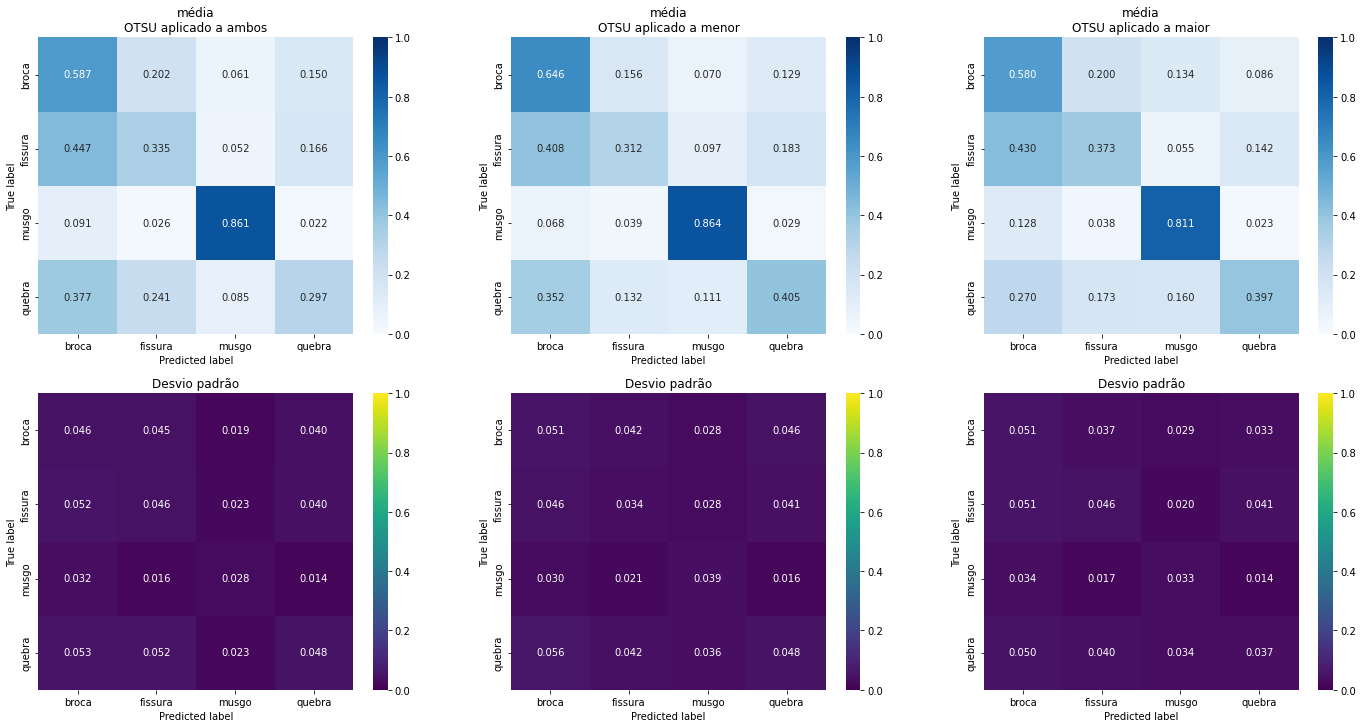

           ambos      menor      maior
count  30.000000  30.000000  30.000000
mean    0.519739   0.556704   0.539665
std     0.026872   0.025592   0.021975
min     0.477654   0.505587   0.491620
25%     0.500000   0.541899   0.526536
50%     0.512570   0.560056   0.541899
75%     0.537709   0.574721   0.550279
max     0.578212   0.597765   0.600559


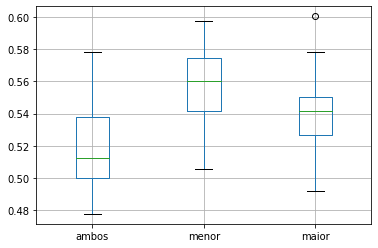

In [3]:
for n_points in points_dict:
  acc_df = pd.DataFrame(data=points_dict[n_points]['acuracias'],
                        columns=FUNC_NAMES)
  print(acc_df)

  print(f'Matrix de confusão a partir do dados do LBP com {n_points} pontos')
  fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))
  for i, name in enumerate(FUNC_NAMES):
    confusion_matrix_mean = np.mean(points_dict[n_points][f'cm_{name}'], axis=0)
    sns.heatmap(
      data=confusion_matrix_mean,
      cmap='Blues',
      vmin=0,
      vmax=1,
      annot=True,
      fmt='.3f',
      mask=confusion_matrix_mean == 0,
      xticklabels=TARGET_NAMES,
      yticklabels=TARGET_NAMES,
      ax=ax[0, i]
      ).set(
          title=f'média\nOTSU aplicado a {name}',
          xlabel='Predicted label',
          ylabel='True label')

    confusion_matrix_std = np.std(points_dict[n_points][f'cm_{name}'], axis=0)
    sns.heatmap(
      data=confusion_matrix_std,
      cmap='viridis',
      vmin=0,
      vmax=1,
      annot=True,
      fmt='.3f',
      mask=confusion_matrix_std == 0,
      xticklabels=TARGET_NAMES,
      yticklabels=TARGET_NAMES,
      ax=ax[1, i]
      ).set(
          title='Desvio padrão',
          xlabel='Predicted label',
          ylabel='True label')
  plt.show()

  print(acc_df.describe())
  acc_df.boxplot()
  plt.show()